In [1]:
import numpy as np     
import pandas as pd

qty_master = pd.read_csv('C:/Users/admin/Desktop/프로젝트 데이터/날씨에따른수요예측.csv', engine='python')
a = qty_master[['date','sm_cat','인천광역시']]                                                                              ######### 변수이름 변경 #########
inc_weather = pd.read_csv('C:/Users/admin/Desktop/프로젝트 데이터/날씨+미세먼지/인천데이터.csv',engine='python')
week =[]
value = 0
for i in range(730):
    week.append(value)
    if value > 5:
        value = 0
    else:
        value+=1
## week data추가
inc_weather['week'] = week                                                                                                  ######### 변수이름 변경 #########

from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
enc.fit(inc_weather.week.values.reshape(-1,1))                                                                              ######### 변수이름 변경 #########

week_ohe = enc.transform(inc_weather.week.values.reshape(-1,1)).toarray()                                                   ######### 변수이름 변경 #########
week_ohe = pd.DataFrame(week_ohe)
week_ohe.columns = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
X = pd.concat([inc_weather,week_ohe], axis = 1)                                                                             ######### 변수이름 변경 #########
inc_weather_week = X.drop('week',axis=1)                                                                                    ######### 변수이름 변경 #########
 
total_incheon = pd.merge(a, inc_weather_week)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [2]:
inc_egg = total_incheon.loc[total_incheon.sm_cat=='계란']

## train, test 분배
from sklearn.model_selection import train_test_split
x = inc_egg[['tem', 'rain', 'hum', 'snow', 'dust', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
y = inc_egg[['인천광역시']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) 

## lm model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train) 

## 예측
qty_predict = [[0,0,0,0,0,0,1,0,0,0,0,0]]
lm.predict(qty_predict)

array([[15.32060713]])

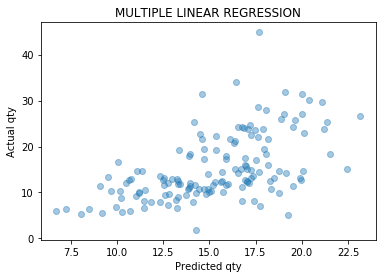

In [6]:
## 예측값과 실제값 시각화
from matplotlib import pyplot as plt
y_predict = lm.predict(x_test)
plt.scatter(y_predict, y_test, alpha=0.4)
plt.xlabel("Predicted qty")
plt.ylabel("Actual qty")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

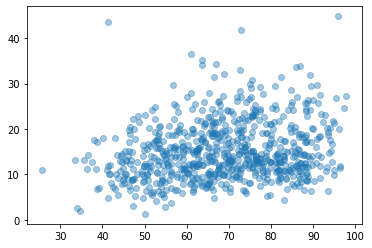

In [7]:
# 계란 판매량 '인천광역시'와 기온 'tem'관계
plt.scatter(inc_egg[['hum']], inc_egg[['인천광역시']], alpha=0.4)
plt.plot()
plt.show()

In [8]:
## 설명해주는 정도
lm.score(x_train, y_train)

0.23839436788804813